In [2]:
from dotenv import load_dotenv
import os
from openai import OpenAI
import langchain 
load_dotenv()
apikey = os.getenv("PINECONE_API_KEY")

In [3]:
from pinecone import Pinecone
# 클라이언트 생성
pinecone_client = Pinecone(api_key=apikey)
pinecone_client

In [ ]:
from pinecone import ServerlessSpec
pinecone_client.create_index(
    name='embedding-3d',
    dimension=3,
    metric='cosine',
    spec=ServerlessSpec(
        cloud='aws',
        region='us-east-1'
    )
)

# index create

In [4]:
index = pinecone_client.Index('embedding-3d')
index

c:\Users\Admin\miniconda3\envs\prompting_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
index.describe_index_stats()

In [ ]:
for ids in index.list(namespace='embedding-3d-ns1'):
    print(ids)

# pinecone data 형식
[{'id' :'vec1', 'values' : [1.0, 1.5, 2.0], 'metadata' : {'genre' : 'drama'}},
{'id' :'vec2', 'values' : [2.0, 1.5, 0.5], 'metadata' : {'genre' : 'action'}},
{'id' :'vec3', 'values' : [0.1, 0.3, 0.5], 'metadata' : {'genre' : 'drama'}},
{'id' :'vec4', 'values' : [1.0, 2.5, 3.5], 'metadata' : {'genre' : 'action'}},
{'id' :'vec5', 'values' : [3.0, 1.2, 1.3], 'metadata' : {'genre' : 'action'}},
{'id' :'vec6', 'values' : [0.3, 1.1, 2.5], 'metadata' : {'genre' : 'drama'}}
]

In [ ]:
index.upsert(
    [
    {'id' :'vec1', 'values' : [1.0, 1.5, 2.0], 'metadata' : {'genre' : 'drama'}},
    {'id' :'vec2', 'values' : [2.0, 1.5, 0.5], 'metadata' : {'genre' : 'action'}},
    {'id' :'vec3', 'values' : [0.1, 0.3, 0.5], 'metadata' : {'genre' : 'drama'}},
    {'id' :'vec4', 'values' : [1.0, 2.5, 3.5], 'metadata' : {'genre' : 'action'}},
    {'id' :'vec5', 'values' : [3.0, 1.2, 1.3], 'metadata' : {'genre' : 'action'}},
    {'id' :'vec6', 'values' : [0.3, 1.1, 2.5], 'metadata' : {'genre' : 'drama'}}
    ],
    namespace='embedding-3d-ns1'
)# update & insert

In [ ]:
index.describe_index_stats()

# id list

In [ ]:
for ids in index.list(namespace='embedding-3d-ns1'):
    print(ids)

# query

In [ ]:
# Pinecone 인덱스에서 K-NN(가까운 이웃) 검색을 수행하는 예시

res = index.query(
    namespace='embedding-3d-ns1',   # 같은 인덱스 안에서의 논리적 파티션 이름
                                    # (업서트/쿼리 시 이 네임스페이스로 구분 저장·검색)
    vector=[0.1, 0.4, 0.7],         # 쿼리 임베딩 벡터(길이는 인덱스 dimension과 동일해야 함: 여기선 3)
                                    # 실제 서비스에선 모델로부터 생성한 임베딩을 넣는다.
    top_k=3,                        # 가장 유사한 상위 3개 벡터 반환
    include_values=True,            # 응답에 각 매치의 벡터 값(values) 포함 여부
                                    # (디버깅/검증용으로 유용, 운영에선 보통 False로 둬서 응답 크기 감소)
    include_metadata=True,          # 응답에 각 매치의 메타데이터 포함 여부
                                    # (필터링된 필드나 부가정보를 확인할 때 사용)
    filter={'genre': {'$eq': 'drama'}}  # 메타데이터 기반 필터: genre == "drama" 인 항목만 검색 대상
                                        # (다중 조건은 {'$and':[...]} / {'$or':[...]} 등 조합 가능)
                                        # $eq 가 == 임
)
res

In [7]:
ns = 'embedding-3d-ns1'
for ids in index.list(namespace=ns):
  print(ids)

['vec1', 'vec2', 'vec3', 'vec4', 'vec5', 'vec6']


# fetch

In [8]:
from itertools import chain
all_ids = list(chain.from_iterable(index.list(namespace=ns)))
resp = index.fetch (ids=all_ids, namespace=ns)
resp

FetchResponse(namespace='embedding-3d-ns1', vectors={'vec6': Vector(id='vec6', values=[0.3, 1.1, 2.5], metadata={'genre': 'drama'}, sparse_values=None), 'vec2': Vector(id='vec2', values=[2.0, 1.5, 0.5], metadata={'genre': 'action'}, sparse_values=None), 'vec4': Vector(id='vec4', values=[1.0, 2.5, 3.5], metadata={'genre': 'action'}, sparse_values=None), 'vec3': Vector(id='vec3', values=[0.1, 0.3, 0.5], metadata={'genre': 'drama'}, sparse_values=None), 'vec5': Vector(id='vec5', values=[3.0, 1.2, 1.3], metadata={'genre': 'action'}, sparse_values=None), 'vec1': Vector(id='vec1', values=[1.0, 1.5, 2.0], metadata={'genre': 'drama'}, sparse_values=None)}, usage={'read_units': 1})

In [9]:
resp.vectors

{'vec6': Vector(id='vec6', values=[0.3, 1.1, 2.5], metadata={'genre': 'drama'}, sparse_values=None),
 'vec2': Vector(id='vec2', values=[2.0, 1.5, 0.5], metadata={'genre': 'action'}, sparse_values=None),
 'vec4': Vector(id='vec4', values=[1.0, 2.5, 3.5], metadata={'genre': 'action'}, sparse_values=None),
 'vec3': Vector(id='vec3', values=[0.1, 0.3, 0.5], metadata={'genre': 'drama'}, sparse_values=None),
 'vec5': Vector(id='vec5', values=[3.0, 1.2, 1.3], metadata={'genre': 'action'}, sparse_values=None),
 'vec1': Vector(id='vec1', values=[1.0, 1.5, 2.0], metadata={'genre': 'drama'}, sparse_values=None)}

# page

In [11]:
for id_page in index.list(namespace=ns):
    resp = index.fetch (ids=all_ids, namespace=ns)
    print(resp)
    for vid , v in resp.vectors.items():
        print(vid, v.values)

FetchResponse(namespace='embedding-3d-ns1', vectors={'vec2': Vector(id='vec2', values=[2.0, 1.5, 0.5], metadata={'genre': 'action'}, sparse_values=None), 'vec1': Vector(id='vec1', values=[1.0, 1.5, 2.0], metadata={'genre': 'drama'}, sparse_values=None), 'vec6': Vector(id='vec6', values=[0.3, 1.1, 2.5], metadata={'genre': 'drama'}, sparse_values=None), 'vec4': Vector(id='vec4', values=[1.0, 2.5, 3.5], metadata={'genre': 'action'}, sparse_values=None), 'vec3': Vector(id='vec3', values=[0.1, 0.3, 0.5], metadata={'genre': 'drama'}, sparse_values=None), 'vec5': Vector(id='vec5', values=[3.0, 1.2, 1.3], metadata={'genre': 'action'}, sparse_values=None)}, usage={'read_units': 1})
vec2 [2.0, 1.5, 0.5]
vec1 [1.0, 1.5, 2.0]
vec6 [0.3, 1.1, 2.5]
vec4 [1.0, 2.5, 3.5]
vec3 [0.1, 0.3, 0.5]
vec5 [3.0, 1.2, 1.3]


# 새로운 쿼리 벡터 추가하기

In [12]:
ids = list(resp.vectors.keys())
ids
values = [vec.values for vec in resp.vectors.values()]

In [13]:
ids.append('qv')
values.append([0.1, 0.3, 0.7]) # 차원 일치 시키기

# 시각화

In [ ]:
# !pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.1 MB 32.8 MB/s eta 0:00:01
   ----------- ---------------------------- 2.4/8.1 MB 5.4 MB/s eta 0:00:02
   -------------------- ------------------- 4.2/8.1 MB 6.6 MB/s eta 0:00:01
   ------------------------------ --------- 6.3/8.1 MB 7.6 MB/s eta 0:00:01
   ------------------------------------- -- 7.6/8.1 MB 7.3 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 7.6 MB/s  0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ------------------ --------------------- 1.0/2.3 MB 3.9 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 6.7 MB/s  0:00:00
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)

   ------------- ---

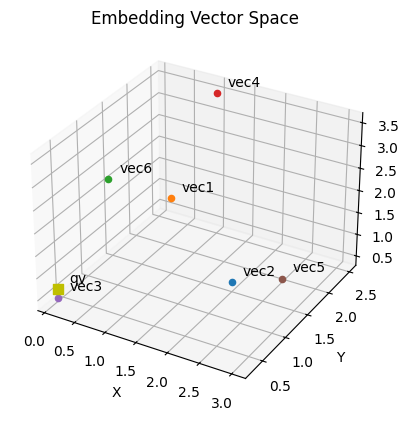

In [14]:
import matplotlib.pyplot as plt

# 3D 플롯을 생성합니다.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 각 벡터의 ID와 값을 사용하여 3D 공간에 점을 그립니다.
for i, id in enumerate(ids):
    if id == "qv":
        # 쿼리 벡터는 노란색 사각형으로 표시합니다.
        ax.scatter(values[i][0], values[i][1], values[i][2], label=id, color='y', s=50, marker='s')
        ax.text(values[i][0] + 0.1, values[i][1] + 0.1, values[i][2] + 0.1, id)
    else:
        # 나머지 벡터는 기본 색상으로 표시합니다.
        ax.scatter(values[i][0], values[i][1], values[i][2], label=id)
        ax.text(values[i][0] + 0.1, values[i][1] + 0.1, values[i][2] + 0.1, id)

# 축 레이블과 제목을 설정합니다.
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Embedding Vector Space')

# 플롯을 표시합니다.
plt.show()

# 임베딩 과제

name: 'quickstart' 서버리스 인덱스 생성  
dim: 1024

In [ ]:
data = [
    {"id": "vec1", "text": "사과는 달콤하고 아삭한 식감으로 유명한 인기 있는 과일입니다."},
    {"id": "vec2", "text": "애플이라는 기술 회사는 아이폰과 같은 혁신적인 제품으로 유명합니다."},
    {"id": "vec3", "text": "많은 사람들이 건강한 간식으로 사과를 즐겨 먹습니다."},
    {"id": "vec4", "text": "애플 주식회사는 세련된 디자인과 사용자 친화적인 인터페이스로 기술 산업을 혁신했습니다."},
    {"id": "vec5", "text": "하루에 사과 하나면 의사를 멀리할 수 있다는 속담이 있습니다."},
    {"id": "vec6", "text": "애플 컴퓨터 회사는 1976년 4월 1일 스티브 잡스, 스티브 워즈니악, 로널드 웨인에 의해 파트너십으로 설립되었습니다."}
]

임베딩 모델
multilingual-e5-large
upsert()
describe_index_stats()
query_vector: "애플이라는 기술회사에 대해 알려주세요


In [27]:
from pinecone import ServerlessSpec
pinecone_client.create_index(
    name='quickstart',
    dimension=1024,
    metric='cosine',
    spec=ServerlessSpec(
        cloud='aws',
        region='us-east-1'
    )
)

{
    "name": "quickstart",
    "metric": "cosine",
    "host": "quickstart-t5eez6q.svc.aped-4627-b74a.pinecone.io",
    "spec": {
        "serverless": {
            "cloud": "aws",
            "region": "us-east-1"
        }
    },
    "status": {
        "ready": true,
        "state": "Ready"
    },
    "vector_type": "dense",
    "dimension": 1024,
    "deletion_protection": "disabled",
    "tags": null
}

In [28]:
index1 = pinecone_client.Index('quickstart')

In [29]:
index1.describe_index_stats()

{'dimension': 1024,
 'index_fullness': 0.0,
 'metric': 'cosine',
 'namespaces': {},
 'total_vector_count': 0,
 'vector_type': 'dense'}

In [30]:
for ids in index1.list(namespace='default'):
    print(ids)

In [ ]:
from sentence_transformers import SentenceTransformer

# multilingual-e5-large 로드
model = SentenceTransformer("intfloat/multilingual-e5-large")

# E5 계열 권장: query/passsage 접두사
data = [
    {"id": "vec1", "text": "사과는 달콤하고 아삭한 식감으로 유명한 인기 있는 과일입니다."},
    {"id": "vec2", "text": "애플이라는 기술 회사는 아이폰과 같은 혁신적인 제품으로 유명합니다."},
    {"id": "vec3", "text": "많은 사람들이 건강한 간식으로 사과를 즐겨 먹습니다."},
    {"id": "vec4", "text": "애플 주식회사는 세련된 디자인과 사용자 친화적인 인터페이스로 기술 산업을 혁신했습니다."},
    {"id": "vec5", "text": "하루에 사과 하나면 의사를 멀리할 수 있다는 속담이 있습니다."},
    {"id": "vec6", "text": "애플 컴퓨터 회사는 1976년 4월 1일 스티브 잡스, 스티브 워즈니악, 로널드 웨인에 의해 파트너십으로 설립되었습니다."}
]
embeddings = model.encode(data, normalize_embeddings=True)  # L2 정규화 옵션
# L2 정규화를 하면 모든 벡터의 길이가 1이 되어서, 순수하게 방향(=의미)만 비교
print(embeddings.shape)  # (2, 1024)


(6, 1024)


In [33]:
# 4. E5 모델 권장: passage 접두사 붙여 임베딩
texts = [f"passage: {d['text']}" for d in data]
embs = model.encode(texts, normalize_embeddings=True)  # (N, 1024)

# 5. 업서트 payload 구성
vectors = [
    {"id": d["id"], "values": embs[i].tolist(), "metadata": {"text": d["text"]}}
    for i, d in enumerate(data)
]

# 6. 업서트 실행
index1.upsert(vectors=vectors)


{'upserted_count': 6}

In [35]:
query = "애플이 만든 혁신적인 제품"
q_emb = model.encode([f"query: {query}"], normalize_embeddings=True)[0]

res = index1.query(vector=q_emb.tolist(), top_k=3, include_metadata=True)
for m in res["matches"]:
    print(m["id"], round(m["score"], 4), m["metadata"]["text"])


vec2 0.8844 애플이라는 기술 회사는 아이폰과 같은 혁신적인 제품으로 유명합니다.
vec4 0.8728 애플 주식회사는 세련된 디자인과 사용자 친화적인 인터페이스로 기술 산업을 혁신했습니다.
vec6 0.8164 애플 컴퓨터 회사는 1976년 4월 1일 스티브 잡스, 스티브 워즈니악, 로널드 웨인에 의해 파트너십으로 설립되었습니다.
